# Video: Visualizations using Principal Components

This video shows visualizations of the Palmer Penguins data set using principal components.

In [70]:
import pandas as pd
from sklearn.decomposition import PCA

pd.options.mode.copy_on_write = True

In [71]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])

In [72]:
penguins_pca_columns = [c for c in penguins.columns if penguins[c].dtype == 'float64']

In [73]:
penguins_pca = PCA()
penguins_pca.fit(penguins[penguins_pca_columns].dropna())
penguins_components = pd.DataFrame(penguins_pca.components_, columns=penguins_pca_columns)
penguins_components

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.004014,-0.001149,0.015170,0.999876,-0.000369,-0.000368
1,-0.308003,0.093243,-0.946673,0.015707,0.001370,0.001227
2,0.936946,0.146198,-0.290194,0.000872,0.054578,0.116471
3,-0.123505,0.974537,0.136403,-0.000390,0.115170,0.056156
4,-0.108833,-0.099775,0.027162,0.000347,0.226099,0.962467
5,0.012303,0.101256,0.004877,-0.000275,-0.965730,0.238616


In [74]:
penguins_projected = penguins[penguins_pca_columns] @ penguins_components.iloc[:2].T
penguins_projected

,0,1
Sample Number,,
1,NaN,NaN
2,3802.494998,-126.955697
3,3252.702651,-144.306729
4,NaN,NaN
5,3452.631432,-138.041368
...,...,...
64,4002.851113,-148.489833
65,3402.802270,-149.551135
66,3777.643724,-137.010635


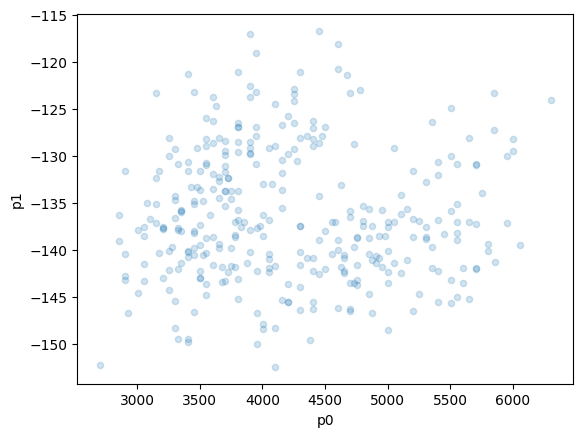

In [75]:
penguins_projected.plot.scatter(0, 1, alpha=0.2)
plt.xlabel("p0")
plt.ylabel("p1")
None

In [76]:
color_map = {"Adelie Penguin (Pygoscelis adeliae)": "blue",
             "Gentoo penguin (Pygoscelis papua)": "orange",
             "Chinstrap penguin (Pygoscelis antarctica)": "green"}
color_map

{'Adelie Penguin (Pygoscelis adeliae)': 'blue',
 'Gentoo penguin (Pygoscelis papua)': 'orange',
 'Chinstrap penguin (Pygoscelis antarctica)': 'green'}

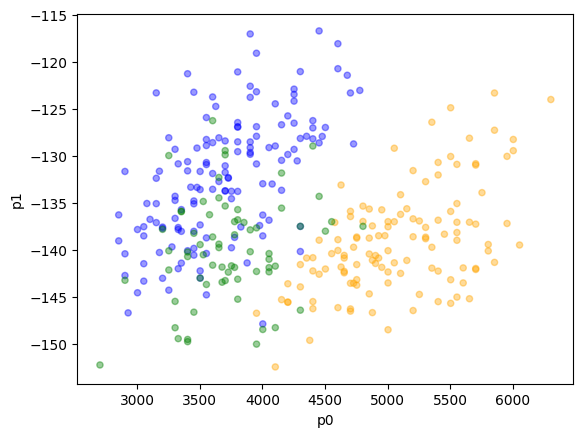

In [77]:
penguins_projected.plot.scatter(0, 1, alpha=0.4, color=penguins["Species"].map(color_map))
plt.xlabel("p0")
plt.ylabel("p1")
None